# Preambule

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import javabridge
import bioformats as bf
javabridge.start_vm(class_path=bf.JARS)
from collections import OrderedDict
import pandas as pd
from scipy.stats import distributions as dst
import numpy as np

from os.path import isdir
from os import makedirs

# %config Completer.use_jedi = False
# from matplotlib.patches import Rectangle

In [2]:
#### command to run in command line to install module:
#### conda install module_name
#### or: 
#### pip3 install module_name
#### Some module names have different names for installation and for importing. 
#### For example, bioformats is discoverable under `python-bioformats`.

In [3]:
def moving_average(a, n=3):
    from numpy import cumsum
    ret = cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [4]:
omeTag = "http://www.openmicroscopy.org/Schemas/OME/2016-06"

# Parse metadata

In [5]:
filename = "Experiment30.lif"


rdr = bf.ImageReader("./data/"+filename, perform_init=True)
md = bf.get_omexml_metadata("./data/"+filename)
xml = bf.OMEXML(md)
Nimages = xml.get_image_count()

In [6]:
%%time
FirstFrames = []
mdf = []
for i in range(Nimages):
    im = xml.image(index=i)
    tmp = OrderedDict([(attrib,getattr(im,attrib)) for attrib in ["Name","AcquisitionDate"]])
    for dim in "XYTCZ":
        tmp[dim] = getattr(im.Pixels, "Size"+dim)
    mdf += [tmp]
    FirstFrames += [rdr.read(series=i, rescale=False,t=0)]

mdf = pd.DataFrame(mdf)

try:
    mdf["AcquisitionDate"] = pd.to_datetime(mdf["AcquisitionDate"])
except:
    pass

mdf#.loc[:,["X","Y","T","inferedTimes"]]

CPU times: user 1.66 s, sys: 103 ms, total: 1.76 s
Wall time: 1.65 s


,Name,AcquisitionDate,X,Y,T,C,Z
0,Image006,2019-08-27 09:44:57,1024,1024,1,1,1
1,Image010,2019-08-27 09:49:28,1024,1024,1,1,1
2,Image012,2019-08-27 09:50:10,1024,1024,1,1,1
3,Series013,2019-08-27 09:50:40,512,512,7583,1,1
4,Image017,2048-03-12 10:41:23,1024,1024,1,1,1
5,Image018,2019-08-27 11:04:23,1024,1024,1,1,1
6,Series019,2019-08-27 11:05:13,512,512,2037,1,1
7,Image021,2019-08-27 11:25:48,1024,1024,1,1,1
8,Series022,2048-03-12 11:03:52,1024,1024,1,1,1
9,Series023,2019-08-27 11:26:47,512,512,984,1,1


# Parse Annotations

In [7]:
import xml.etree.ElementTree as ET

In [8]:
realXML = xml.to_xml()

with open("tmp.xml","w") as f:
    f.write(realXML)
tree = ET.ElementTree(file="tmp.xml")
root = tree.getroot()

annotations = root[-1]

allFeatures = np.unique([" ".join(elem.text.split()[1:]) for elem in annotations.iter("{%s}"%omeTag+"Key")])

len(allFeatures)

205

In [9]:
%%time
features = pd.DataFrame(index=mdf.Name,columns=allFeatures)

for elem in annotations.iter("{%s}"%omeTag + "OriginalMetadata"):
    keys   = elem.findall(   "{%s}"%omeTag + "Key")
    values = elem.findall(   "{%s}"%omeTag + "Value")
    assert len(keys)==len(values)
    for k,v in zip(keys,values):
        name = k.text.split()[0]
        feature = " ".join(k.text.split()[1:])
        features.loc[name, feature] = v.text

CPU times: user 6.45 s, sys: 19.1 ms, total: 6.47 s
Wall time: 6.47 s


In [10]:
len(features.columns)

205

In [11]:
for ft in allFeatures:
    try:
        features[ft] = pd.to_numeric(features[ft], downcast="float")
    except:
        continue
        
    try:
        v = features[ft]
        vint = pd.to_numeric(v, downcast="integer")
        if np.sum((vint-v)**2)==0:
            features[ft] = vint
    except:
        continue

In [12]:
constFeatures = OrderedDict([(ft,features[ft].values[0]) for ft in allFeatures if len(features[ft].unique())==1])

In [13]:
# assert all numerical constanct values do NOT have NANs
assert np.all([np.isfinite(features[ft].values) for ft in constFeatures if type(constFeatures[ft])!=str])

In [14]:
varFeatures = [ft for ft in allFeatures if ft not in constFeatures]

features = features[varFeatures]

len(features.columns)

33

In [15]:
nameAlias = OrderedDict([(ft,ft.split("|")[-1].replace(" ","_").replace("#","")) for ft in varFeatures])

In [16]:
lineAvg = features.rename(columns=nameAlias)['nAverageLine_1']

In [17]:
mdf = mdf.join(lineAvg,on="Name")

In [18]:
# # This should add columns with information about time, but it does not give results as expected for Line Scans
# addColls = ["DimensionDescription|Length", "DimensionDescription|Unit"]
# renameColls = {c:c.replace("DimensionDescription|","Time") for c in addColls}
# mdf = mdf.join(features[addColls].rename(renameColls,axis="columns"),on="Name")
# appFreq = mdf['T']/mdf["TimeLength"]
# appFreq[mdf["TimeUnit"]=="m"] = np.nan
# appFreq[~np.isfinite(appFreq)] = np.nan
# mdf.join(pd.DataFrame({"apparentFreq":appFreq})).query("ScanMode=='xt'")

In [19]:
# add column about scan mode
tmp = features.rename(nameAlias,axis="columns")["csScanMode_1"].copy()
mdf["ScanMode"] = tmp.values

In [20]:
# Have a look
mdf

,Name,AcquisitionDate,X,Y,T,C,Z,nAverageLine_1,ScanMode
0,Image006,2019-08-27 09:44:57,1024,1024,1,1,1,128,xyt
1,Image010,2019-08-27 09:49:28,1024,1024,1,1,1,128,xyt
2,Image012,2019-08-27 09:50:10,1024,1024,1,1,1,128,xyt
3,Series013,2019-08-27 09:50:40,512,512,7583,1,1,8,xyt
4,Image017,2048-03-12 10:41:23,1024,1024,1,1,1,1024,xyt
5,Image018,2019-08-27 11:04:23,1024,1024,1,1,1,128,xyt
6,Series019,2019-08-27 11:05:13,512,512,2037,1,1,8,xyt
7,Image021,2019-08-27 11:25:48,1024,1024,1,1,1,128,xyt
8,Series022,2048-03-12 11:03:52,1024,1024,1,1,1,128,xyt
9,Series023,2019-08-27 11:26:47,512,512,984,1,1,8,xyt


# Time profiles

In [21]:
# define save directory
saveDir = f"./data/{filename.split('.')[0]}/"
if not isdir(saveDir):
    makedirs(saveDir)
# define output format (can do png, jpg, pdf, eps...)
outFormat = ".png"

In [139]:
# choose the name of the Series you want to see
# The code further down is only for Line scans
Name = "Series037"

In [140]:
# to see features in the Metadata for this Series:
# pd.concat([mdf.query(f"Name=='{Name}'").iloc[0],features.loc[Name]])

In [141]:
idx = mdf.query(f"Name=='{Name}'").index[0]
dimensions = mdf.loc[idx,list("XYZCT")]
image = np.array([
            rdr.read(series=idx, rescale=False,t=t, ) for t in range(dimensions["T"])
        ])

In [142]:
LineT = np.vstack(image)
LineT.shape

(80000, 512)

In [143]:
TotalTime = 20.331 # from Sandra's screenshot

In [144]:
time = np.linspace(0,TotalTime,len(LineT))

In [145]:
timeWindowShow = (0,TotalTime)
timeWindowAvg  = 10  # number of time points to average over
pxAvg = 1            # number pixels to average over (1 means no average)

twIndices = slice(*(np.where(time>=tl)[0][0] for tl in timeWindowShow))
smoothTime = moving_average(time[twIndices],timeWindowAvg-1)[::timeWindowAvg//2]

# define smoothed time profiles over time (per pixel)
smoothLine = np.array([moving_average(line,timeWindowAvg-1)[::timeWindowAvg//2] for line in LineT[twIndices].T]).T
# further smoothing over pixels
smoothAvgLine = smoothLine.reshape(len(smoothLine),LineT.shape[1]//pxAvg,pxAvg).mean(axis=-1)
# define constant offsets per pixel as some percentile
# (this is a problem for pixels that obviously move in one direction)
offsets = np.percentile(smoothAvgLine,5,axis=0)
offsetM = np.array([offsets]*len(smoothAvgLine))
X = smoothAvgLine-offsetM

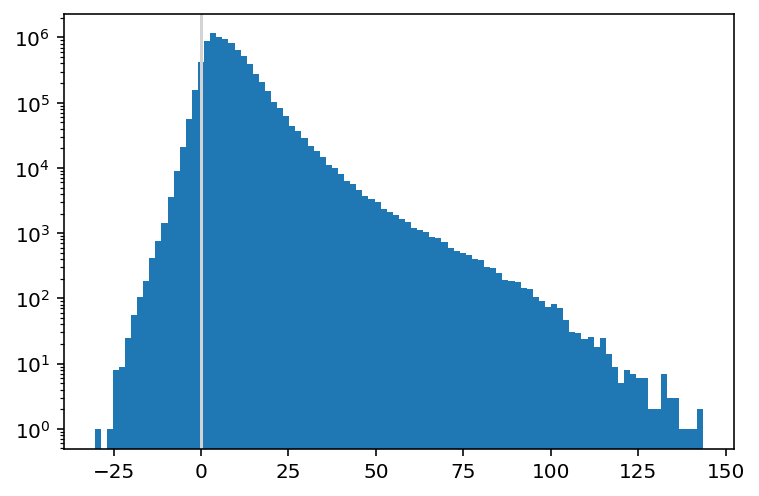

In [146]:
plt.hist(X.flatten(),100);
plt.yscale("log")
plt.axvline(0,color="lightgrey")

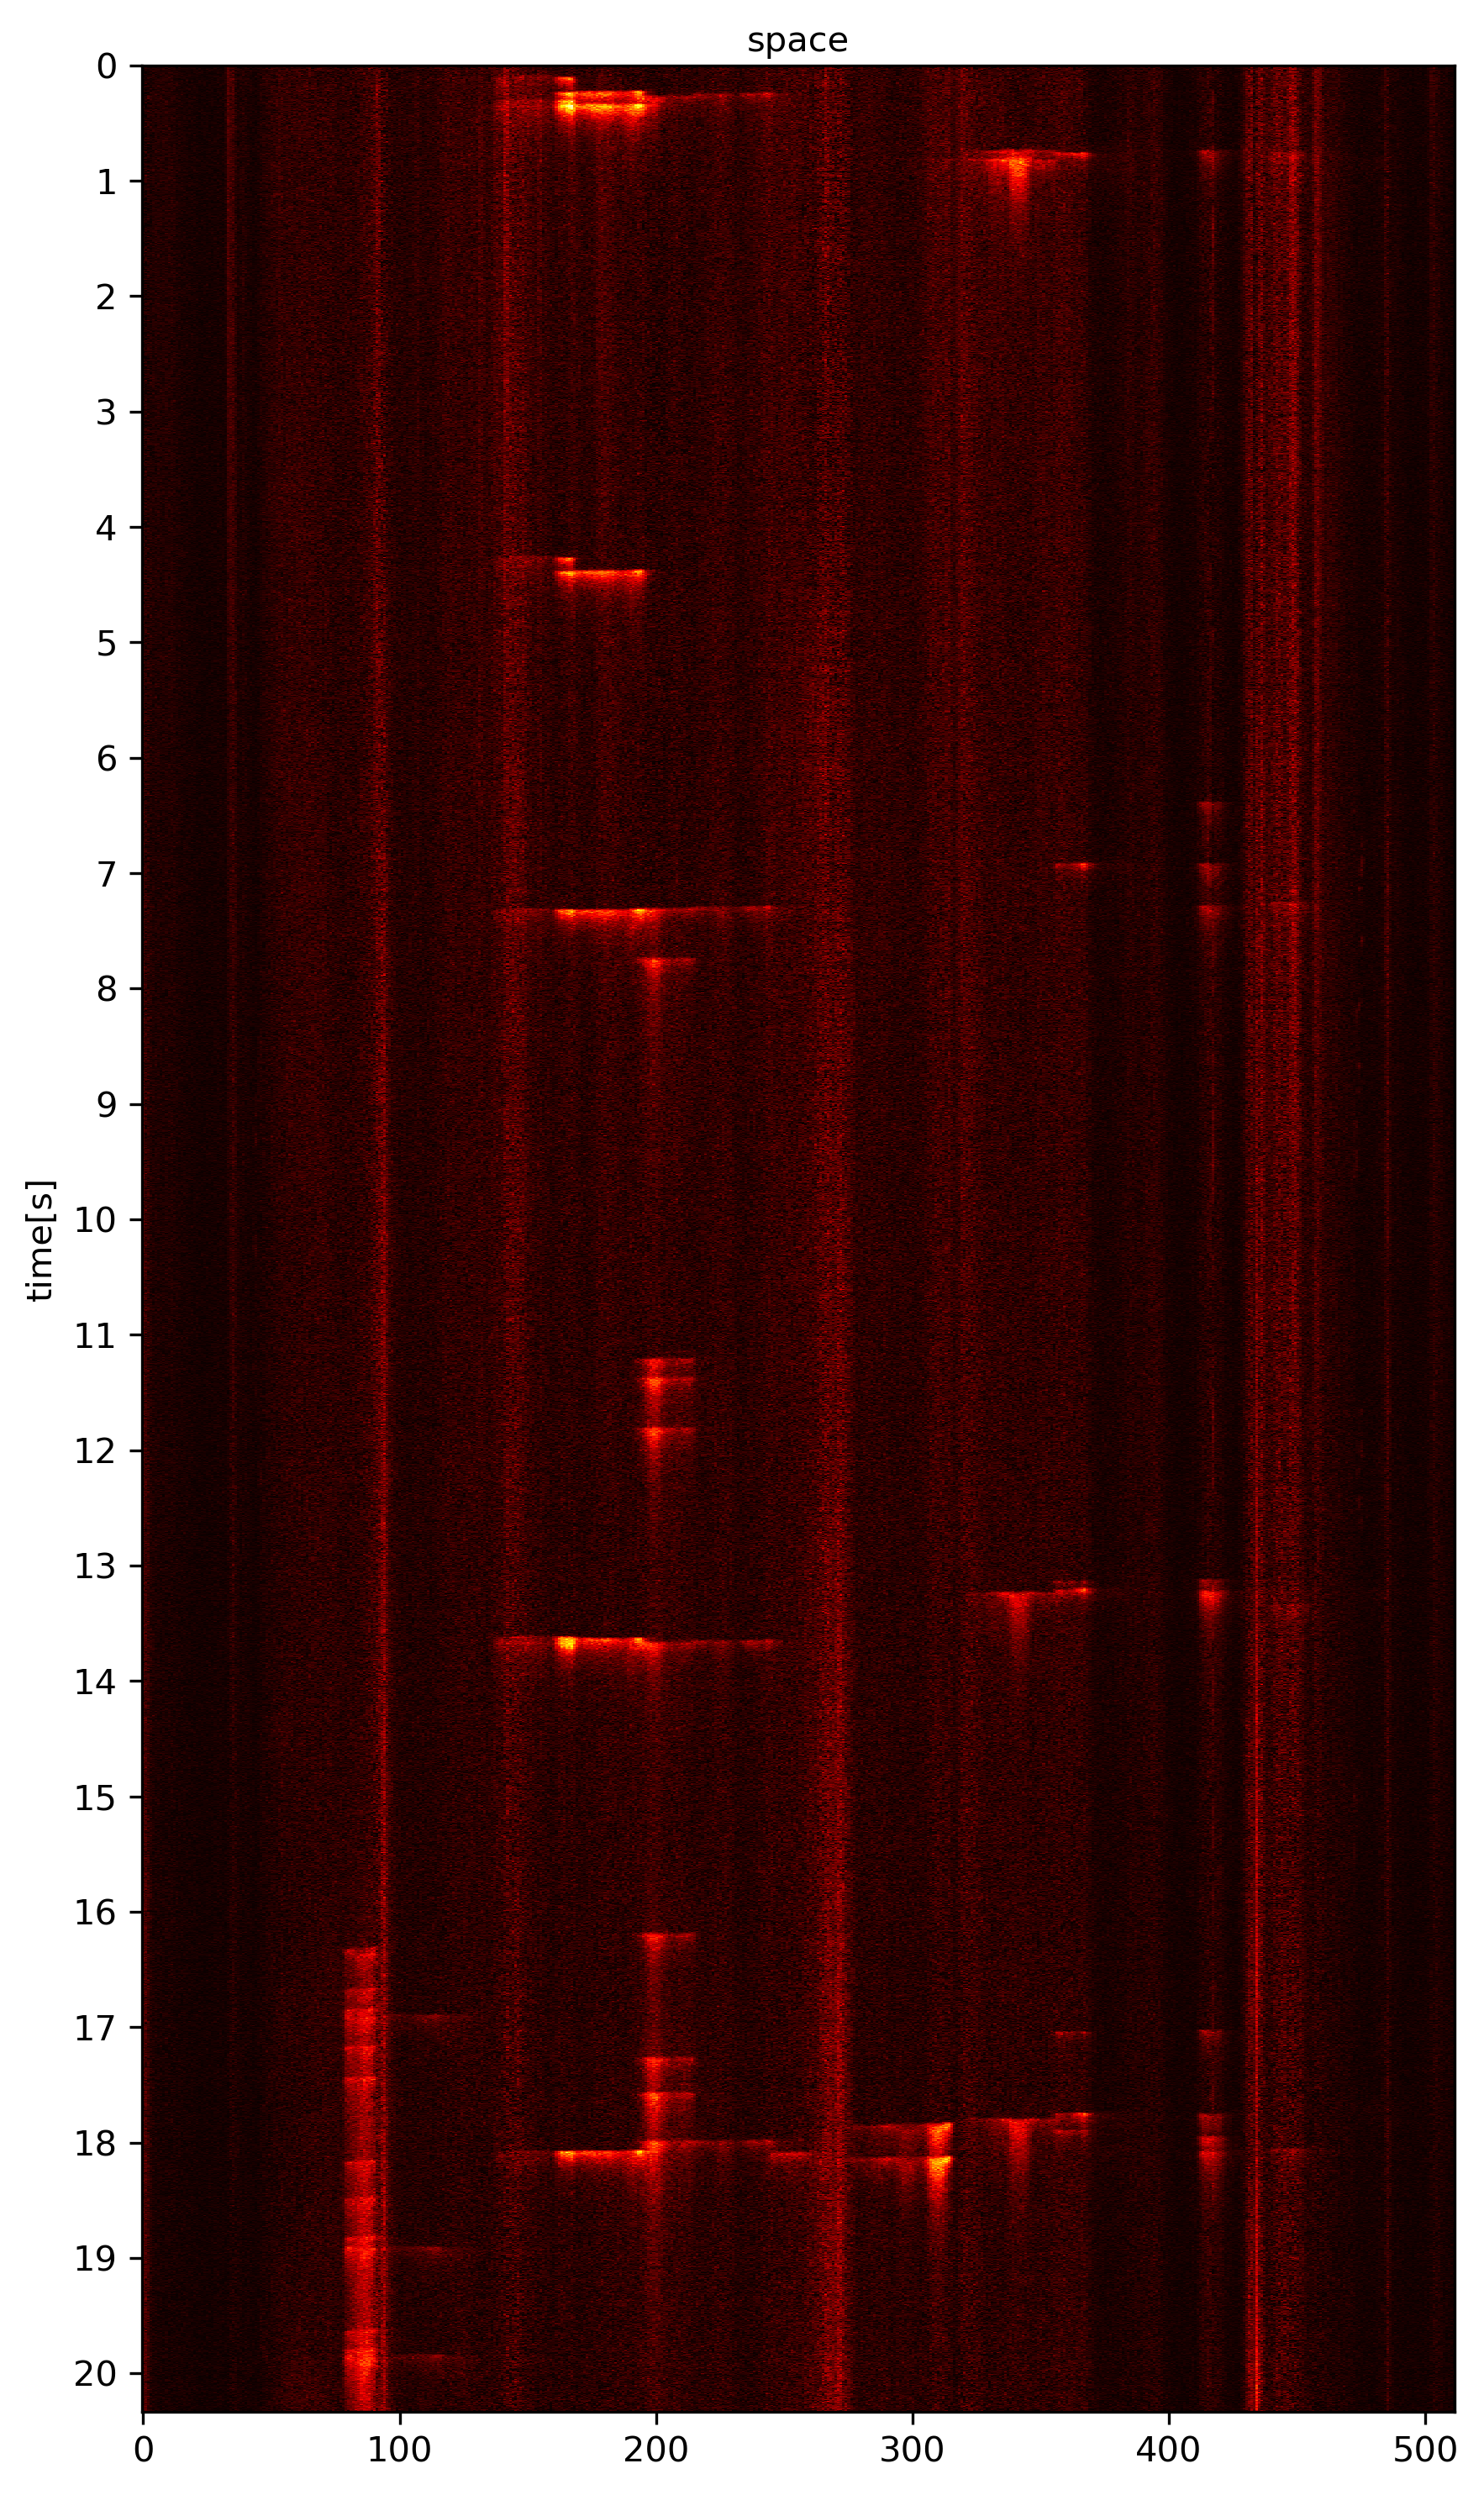

In [147]:
fig = plt.figure(figsize=(6,10),dpi = 150)
ax = plt.subplot(111)
ax.set_aspect("auto")

ax.imshow(X, cmap="hot",
          vmin=0, # to threshold some small values
          extent=(-.5,smoothAvgLine.shape[1]-.5,timeWindowShow[1],timeWindowShow[0])
         )
plt.xlabel("space")
plt.ylabel("time[s]")
plt.yticks(np.arange(0,TotalTime))
# plt.xticks([])
ax.set_aspect("auto")
# ax.grid(linewidth = .2)
ax.xaxis.set_label_position("top")
fig.tight_layout()
fig.savefig(saveDir+Name+outFormat)
# plt.close(fig)

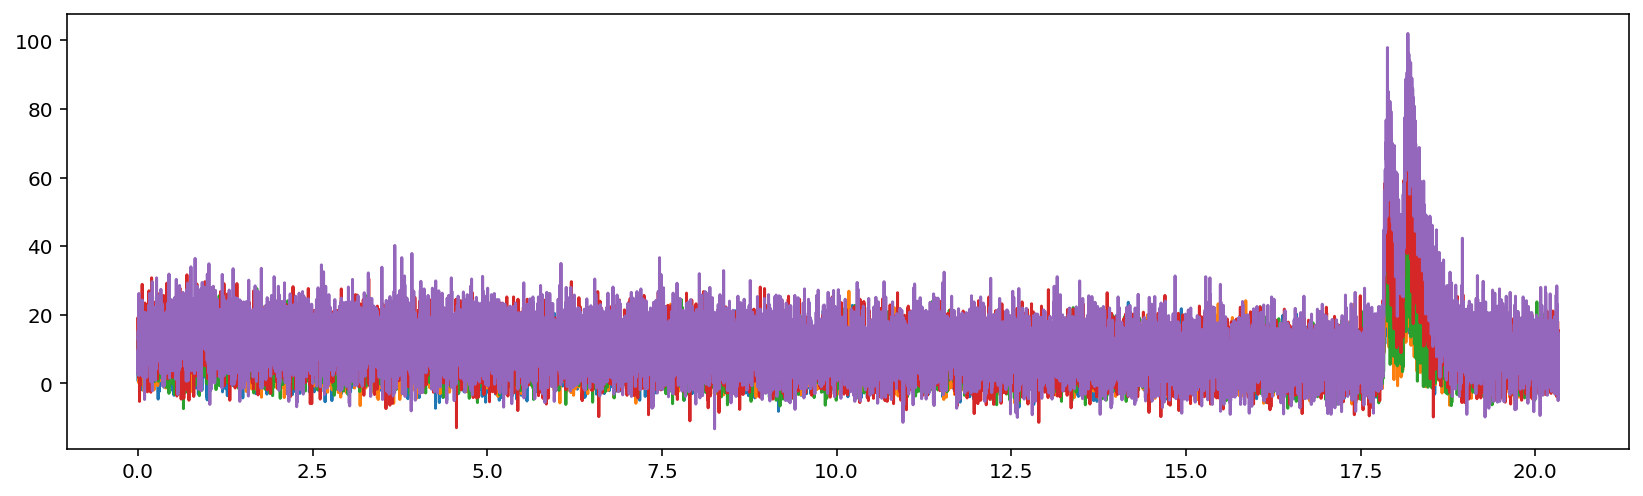

In [151]:
plt.figure(figsize=(14,4))
plt.plot(smoothTime,X[:,300:310:2]);
# plt.xlim(0,1.3)

In [89]:
Name

'Series029'

In [137]:
xr = np.linspace(-1,14,1000)

/Users/srdjan/anaconda2/envs/physio/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/srdjan/anaconda2/envs/physio/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


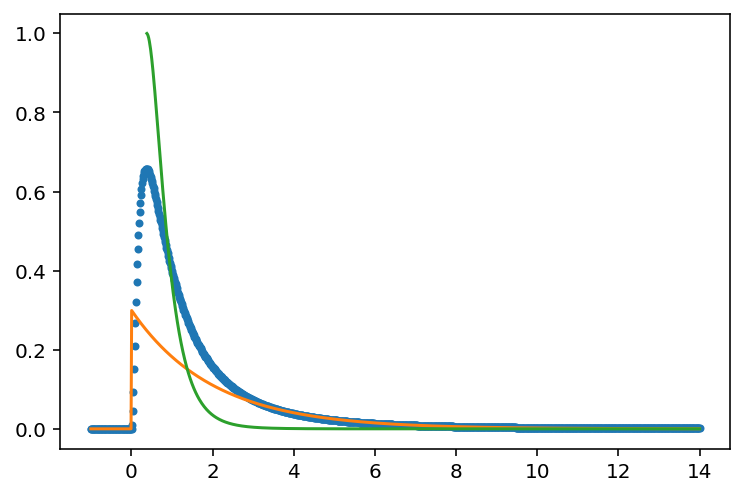

In [138]:
plt.plot(xr,dst.lognorm.pdf(xr,s=1),".")
plt.plot(xr,dst.expon.pdf(xr/2)*.3)
myf = lambda xi: np.exp(-(np.log(xi)-(-1))**2.3)
plt.plot(xr,myf(xr))

# plt.yscale("log")

# Kill javabridge

In [ ]:
javabridge.kill_vm()